By Luke Leckie. Code for publication entitled "The content and structure of dreams are coupled to affect "

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import cython
import pickle
from gensim.models import Word2Vec, KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.preprocessing import normalize
import numpy as np
import networkx as nx
%matplotlib inline
import semantic_network_functions as sn


In [16]:
#Load in model and corpus
direc='/home/ll16598/Documents/altered_states/2024/'
corpus_cleaned = pd.read_csv(direc+f"corpus_results_130_DI_cosine.csv") 


In [17]:
#HVdC subset data
corpus_cleaned_sub=corpus_cleaned[corpus_cleaned['dreamer'].isin(['norms-f','norms-m'])]
corpus_cleaned_sub_m=corpus_cleaned[corpus_cleaned['dreamer'].isin(['norms-m'])]
corpus_cleaned_sub_f=corpus_cleaned[corpus_cleaned['dreamer'].isin(['norms-f'])]

These are the properties we want to perform our PLS with. 1 is where we take valence as a response and 2 is where we take arousal as a response.

In [18]:
columns_to_plot1 = ['Arousal','Cosine path','Cosine mod.','Std. coherence','Mean coherence','Topic path','Efficiency','Nodes','Clustering', 'Feedback loops', 'Degree het.','Transitivity', 'Gini', 'Modularity']
columns_to_plot2 = ['Valence','Cosine path','Cosine mod.','Std. coherence','Mean coherence','Topic path','Efficiency','Nodes','Clustering', 'Feedback loops', 'Degree het.','Transitivity', 'Gini', 'Modularity']


First we will evaluate what is the optimal number of components to use in our model. This is assesses in cross-validation for the larger data and Leave-one-out for the smallest subsets.

In [6]:
for i, df in enumerate([corpus_cleaned]):#, corpus_cleaned_sub, corpus_cleaned_sub_f, corpus_cleaned_sub_m]):
    df['Valence']=df['median_Valence']
    df['Arousal']=df['median_Arousal']
    params=['median_Valence', 'median_Arousal']
    cols=[columns_to_plot1,columns_to_plot2]
    for k, param in enumerate(params):
        print(param)
        col=cols[k]
        if i in [0,1]:
            sn.get_optimal_components_via_cv(df, col,param, n_splits=5)
        else:
            sn.get_optimal_components_via_loo(df, col,param)


median_Valence
Components: 1 R2: 0.09711666532001118
Components: 2 R2: 0.10621503722275258
Components: 3 R2: 0.1141838828874723
Components: 4 R2: 0.11452427648432469
Components: 5 R2: 0.11473602015534065
Components: 6 R2: 0.11469088623561033
Components: 7 R2: 0.11472185003041924
Components: 8 R2: 0.11481935867584267
Components: 9 R2: 0.11478580608355318
median_Arousal
Components: 1 R2: 0.30758757445657114
Components: 2 R2: 0.3115086310326861
Components: 3 R2: 0.31302263711388256
Components: 4 R2: 0.31323547201151747
Components: 5 R2: 0.3134039153944304
Components: 6 R2: 0.31365747552499795
Components: 7 R2: 0.31389182081984834
Components: 8 R2: 0.3139572075207718
Components: 9 R2: 0.3139810837347107


Just setting aesthetic plotting parameters

In [7]:
tick_length=1
linewidth=1
pointwidth = 0.7
linewidth2 = 1
linewidth3 = 1
linalpha=0.8
figwidth= 7.0866
panels=2
figheight=((figwidth*panels)/3.333)*1
figwidth=figwidth/2.6
lincolor='black'
labsize=7
titlesize=10
alpha=0.9 #0.7 #0.1 for sim
pointsize=2
barwidth=0.57
barcol='#6baed6'
barcols=list(['#482677ff','#482677ff','#6baed6','#6baed6','#6baed6','#6baed6','#35be1e','#35be1e','#35be1e','#35be1e', '#35be1e', '#35be1e'])
barcols=list(['#FDE725FF', '#482677ff'])
coolwarm = plt.cm.get_cmap('coolwarm')
barcols2=[coolwarm(1.0), coolwarm(0.0)]
al=0.35
alphas1=list([al,al,1,1,al,al,al,al,1,1,1,1])
alphas2=list([1,1,1,1,1,1,1,1,1,1,1,1,1])
starsize=6.8
labsize=5.7
linewidth_bar=0.7
p_push1=0.00003
p_push2=0.0011
starsize=7.5
savefig=False
dir_fig_save='/home/ll16598/Documents/altered_states/2024/plots/'
dir_pls_save='/home/ll16598/Documents/altered_states/2024/pls_coeffs/'

/tmp/ipykernel_370044/619328245.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  coolwarm = plt.cm.get_cmap('coolwarm')


Now we just perform our selected PLS model and plot.

          Variable  Coefficients  P-Values
0   Std. coherence      0.006878  0.000000
1   Mean coherence      0.005380  0.000000
2      Cosine mod.      0.001289  0.000000
3       Modularity      0.001170  0.000000
4       Topic path      0.000495  0.030154
5      Cosine path      0.000492  0.030154
6       Efficiency     -0.000432  0.021000
7   Feedback loops     -0.000469  0.070000
8       Clustering     -0.000564  0.024182
9     Transitivity     -0.000803  0.009333
10           Nodes     -0.001145  0.000000
11     Degree het.     -0.001829  0.000000
12            Gini     -0.001962  0.000000
13         Arousal     -0.013538  0.000000


/tmp/ipykernel_370044/1585274011.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels, rotation=45, ha='right', fontsize=labsize)


          Variable  Coefficients  P-Values
0            Nodes      0.003504  0.000000
1      Degree het.      0.002176  0.000000
2             Gini      0.002017  0.000000
3      Cosine mod.      0.000733  0.012444
4       Clustering      0.000539  0.168000
5       Modularity      0.000191  0.726000
6       Topic path     -0.000146  0.726000
7      Cosine path     -0.000155  0.726000
8     Transitivity     -0.001031  0.023800
9       Efficiency     -0.001511  0.000000
10  Feedback loops     -0.001512  0.000000
11         Valence     -0.024979  0.000000
12  Std. coherence     -0.025839  0.000000
13  Mean coherence     -0.032697  0.000000


/tmp/ipykernel_370044/1585274011.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels, rotation=45, ha='right', fontsize=labsize)


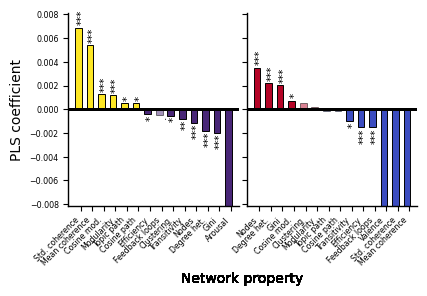

In [9]:
subset=False #Used HVdC subset data
savefig=False #Save data
savedat=False #Save coefficients
if subset:
    df=corpus_cleaned_sub
else:
    df=corpus_cleaned
comps=[1,1] #Number of components for valence and for arousal
params=['Valence', 'Arousal']
cols=[columns_to_plot1,columns_to_plot2]
fig, axes = plt.subplots(1, 2, figsize=(4.5, 2.5))  # 1 row, 2 columns
axes=axes.flatten()
for k, param in enumerate(params):
    df['Valence']=df['median_Valence']
    df['Arousal']=df['median_Arousal']
    axs=axes[k]
    col=cols[k]
    result = sn.get_pls_coefficients(df, col,param,optimal_components=comps[k],n_permutations=1000)
    result=result.sort_values(by='Coefficients', ascending=False).reset_index(drop=True)
    print(result)
    p_values = result['P-Values']
    loadings = result['Coefficients']
    labels = result['Variable']
    if savedat and subset:
        result.to_csv(dir_pls_save+f'pls_combined_HVdC.csv')
    elif savedat:
        result.to_csv(dir_pls_save+f'pls_combined.csv')
    x = np.arange(len(labels))
    axs.bar(x - 0.2, loadings, 0.4, label='All', align='center')
    axs.set_xticklabels(labels, rotation=45, ha='right', fontsize=labsize)
    for bs in range(0, len(axs.patches)):
        bar=axs.patches[bs]
        pv=p_values[bs]
        old_width = bar.get_width()
        diff = (old_width - barwidth) / 2
        val=bar.get_height()
        if k==0:
            if val>0:
                bc=barcols[0]
            else:
                bc=barcols[1]
        else:
            if val>0:
                bc=barcols2[0]
            else:
                bc=barcols2[1]
        bar.set_linewidth(linewidth_bar)
        bar.set_width(barwidth)
        bar.set_x(bar.get_x() + diff)
        bar.set_color(bc)
        bar.set_edgecolor('black')
        height=bar.get_height()
        if height>0:
            height=height+p_push1
        else:
            height=height-p_push2
        if p_values[bs]>0.05:
            bar.set_alpha(0.5)
        if bs!=len(axs.patches)-1:
            if height<-0.008:
                continue
            significance_code = '***' if pv <= 0.0001 else '***' if pv <= 0.001 else '**' if pv <= 0.01 else '*' if pv <= 0.05 else '.' if pv <= 0.1 else ''
            if height>0:
                axs.text(bar.get_x()+bar.get_width()-0.01, height+0.0002, significance_code, va='bottom', fontsize=starsize, \
                         color='black', rotation=90, ha='center')
            else:
                axs.text(bar.get_x()+bar.get_width()-0.01, height+0.00105, significance_code, va='top', fontsize=starsize, \
                         color='black', rotation=90, ha='center')
        axs.set_xticks(x)
        axs.set_xticklabels(labels, rotation=45, ha='right', fontsize =labsize)
        axs.tick_params(axis='y', labelsize=labsize)
        axs.axhline(0, color='black', linestyle='-', linewidth=linewidth)
        axs.spines['right'].set_visible(False)
        axs.spines['top'].set_visible(False)
        axs.spines['left'].set_linewidth(linewidth)
        axs.spines['left'].set_color(lincolor)
        axs.spines['bottom'].set_linewidth(linewidth)
        axs.spines['bottom'].set_color(lincolor)
        axs.set_ylim(-0.00611, 0.00611)
        axs.set_ylim(-0.00811, 0.00811)
        if k==0:
            axs.set_ylabel('PLS coefficient',fontsize=titlesize)
        else:
            axs.set_ylabel('',fontsize=titlesize)
            axs.set_yticklabels([])
        for line in axs.lines:
            line.set_linewidth(linewidth3)
        axs.axhline(0, color='black', linewidth=linewidth)
plt.subplots_adjust(wspace=0.05, hspace=0.5)
fig.text(0.51, -0.2, 'Network property', ha='center', rotation=0, fontsize=titlesize, fontweight='normal')
if savefig:
    plt.savefig(dir_fig_save+f'pls_figure.png', dpi=800,  bbox_inches='tight')
